Данные взяты с сайта https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)

In [314]:
# Подключаем дополнительный пакет
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
# для отображения графиков
%matplotlib inline

# Описание данных:
Местное время в Москве (ВДНХ) - Время в данном населённом пункте. Учитывается летнее/зимнее время
T - Температура воздуха (градусы Цельсия) на высоте 2 метра над поверхностью земли
Po - Атмосферное давление на уровне станции (миллиметры ртутного столба
P - Атмосферное давление, приведенное к среднему уровню моря (миллиметры ртутного столба)
Pa - Барическая тенденция: изменение атмосферного давления за последние три часа (миллиметры ртутного столба 
U - Относительная влажность (%) на высоте 2 метра над поверхностью земли
DD - Направление ветра (румбы) на высоте 10-12 метров над земной поверхностью, осредненное за 10-минутный период, непосредственно предшествовавший сроку наблюдения
Ff - Cкорость ветра на высоте 10-12 метров над земной поверхностью, осредненная за 10-минутный период, непосредственно предшествовавший сроку наблюдения (метры в секунду)
ff10 - Максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за 10-минутный период, непосредственно предшествующий сроку наблюдения (метры в секунду)
ff3 - Максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за период между сроками (метры в секунду
N - Общая облачность
WW - Текущая погода, сообщаемая с метеорологической станции
W1 - Прошедшая погода между сроками наблюдения 1
W2 - Прошедшая погода между сроками наблюдения 2
Tn - Минимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Tx - Максимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Cl - Слоисто-кучевые, слоистые, кучевые и кучево-дождевые облака
Nh - Количество всех наблюдающихся облаков Cl или, при отсутствии облаков Cl, количество всех наблюдающихся облаков Cm
H - Высота основания самых низких облаков (м)
Cm - Высококучевые, высокослоистые и слоисто-дождевые облака
Ch - Перистые, перисто-кучевые и перисто-слоистые облака
VV - Горизонтальная дальность видимости (км)
Td - Температура точки росы на высоте 2 метра над поверхностью земли (градусы Цельсия)
RRR - Количество выпавших осадков (миллиметры)
tR - Период времени, за который накоплено указанное количество осадков (часы)
E - Состояние поверхности почвы без снега или измеримого ледяного покрова
Tg - Минимальная температура поверхности почвы за ночь. (градусы Цельсия)
E - Состояние поверхности почвы со снегом или измеримым ледяным покровом
sss - Высота снежного покрова (см)

In [315]:
#data_path = "https://github.com/mad-i-son/math_statistic/blob/kursovoy/Msk_6years.xls?raw=true"  # строка
data_path = "https://github.com/mad-i-son/math_statistic/blob/kursovoy/Msk_16years.xls?raw=true"  # строка

data = pd.read_excel(data_path, skiprows=6)

data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,06.06.2021 12:00,21.5,747.2,760.9,-0.4,54.0,"Ветер, дующий с востоко-северо-востока",2.0,NaN,NaN,...,"Высококучевые, образовавшиеся из кучевых (или ...","Перистых, перисто-кучевых или перисто-слоистых...",10,11.8,NaN,NaN,NaN,NaN,NaN,NaN
1,06.06.2021 09:00,19.5,747.6,761.4,-0.4,62.0,"Ветер, дующий с востока",1.0,NaN,NaN,...,Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",10,12.1,Осадков нет,12.0,Поверхность почвы сухая (без трещин и без заме...,13.0,NaN,NaN
2,06.06.2021 06:00,14.2,748.0,762.1,-0.3,80.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,...,NaN,NaN,10,10.8,Осадков нет,12.0,NaN,NaN,NaN,NaN
3,06.06.2021 03:00,11.4,748.3,762.6,-0.4,93.0,"Штиль, безветрие",0.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10,10.3,NaN,NaN,NaN,NaN,NaN,NaN
4,06.06.2021 00:00,13.8,748.7,762.8,0.1,80.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56078,06.06.2005 12:00,23.9,745.4,758.8,NaN,60.0,"Ветер, дующий с юго-юго-запада",1.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перисто-кучевые одни или перисто-кучевые, сопр...",10,15.6,NaN,NaN,NaN,NaN,NaN,NaN
56079,06.06.2005 09:00,20.8,745.5,759.1,NaN,65.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,"Перисто-кучевые одни или перисто-кучевые, сопр...",10,14.1,NaN,NaN,NaN,NaN,NaN,NaN
56080,06.06.2005 06:00,15.1,745.6,759.4,NaN,76.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,10,11.0,NaN,NaN,NaN,NaN,NaN,NaN
56081,06.06.2005 03:00,14.5,745.6,759.4,NaN,85.0,"Штиль, безветрие",0.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...",NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN


In [316]:
# Отобразим все колонки 
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [317]:
data['date'] = date  # добавили новую колонку
data = data.set_index('date')  # сделаем эту колонку индексом
data.index  # был RangeIndex - числа, стал Datetime - даты

DatetimeIndex(['2021-06-06 12:00:00', '2021-06-06 09:00:00',
               '2021-06-06 06:00:00', '2021-06-06 03:00:00',
               '2021-06-06 00:00:00', '2021-06-05 21:00:00',
               '2021-06-05 18:00:00', '2021-06-05 15:00:00',
               '2021-06-05 12:00:00', '2021-06-05 09:00:00',
               ...
               '2005-06-07 03:00:00', '2005-06-07 00:00:00',
               '2005-06-06 21:00:00', '2005-06-06 18:00:00',
               '2005-06-06 15:00:00', '2005-06-06 12:00:00',
               '2005-06-06 09:00:00', '2005-06-06 06:00:00',
               '2005-06-06 03:00:00', '2005-06-06 00:00:00'],
              dtype='datetime64[ns]', name='date', length=56083, freq=None)

In [318]:
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
date,,,,,,,,,,,,,,,,,,,,,
2021-06-06 12:00:00,06.06.2021 12:00,21.5,747.2,760.9,-0.4,54.0,"Ветер, дующий с востоко-северо-востока",2.0,NaN,NaN,...,"Высококучевые, образовавшиеся из кучевых (или ...","Перистых, перисто-кучевых или перисто-слоистых...",10,11.8,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-06 09:00:00,06.06.2021 09:00,19.5,747.6,761.4,-0.4,62.0,"Ветер, дующий с востока",1.0,NaN,NaN,...,Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",10,12.1,Осадков нет,12.0,Поверхность почвы сухая (без трещин и без заме...,13.0,NaN,NaN
2021-06-06 06:00:00,06.06.2021 06:00,14.2,748.0,762.1,-0.3,80.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,...,NaN,NaN,10,10.8,Осадков нет,12.0,NaN,NaN,NaN,NaN
2021-06-06 03:00:00,06.06.2021 03:00,11.4,748.3,762.6,-0.4,93.0,"Штиль, безветрие",0.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10,10.3,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-06 00:00:00,06.06.2021 00:00,13.8,748.7,762.8,0.1,80.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-06-06 12:00:00,06.06.2005 12:00,23.9,745.4,758.8,NaN,60.0,"Ветер, дующий с юго-юго-запада",1.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перисто-кучевые одни или перисто-кучевые, сопр...",10,15.6,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-06 09:00:00,06.06.2005 09:00,20.8,745.5,759.1,NaN,65.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,"Перисто-кучевые одни или перисто-кучевые, сопр...",10,14.1,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-06 06:00:00,06.06.2005 06:00,15.1,745.6,759.4,NaN,76.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,10,11.0,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
# Данные были в переверном порядке от новых записей к старым, сделали от старых к новым
data = data.sort_values('date')
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
date,,,,,,,,,,,,,,,,,,,,,
2005-06-06 00:00:00,06.06.2005 00:00,18.3,745.6,759.3,NaN,68.0,"Ветер, дующий с юго-запада",1.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...",NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-06 03:00:00,06.06.2005 03:00,14.5,745.6,759.4,NaN,85.0,"Штиль, безветрие",0.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...",NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-06 06:00:00,06.06.2005 06:00,15.1,745.6,759.4,NaN,76.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,10,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-06 09:00:00,06.06.2005 09:00,20.8,745.5,759.1,NaN,65.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,"Перисто-кучевые одни или перисто-кучевые, сопр...",10,14.1,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-06 12:00:00,06.06.2005 12:00,23.9,745.4,758.8,NaN,60.0,"Ветер, дующий с юго-юго-запада",1.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перисто-кучевые одни или перисто-кучевые, сопр...",10,15.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-06 00:00:00,06.06.2021 00:00,13.8,748.7,762.8,0.1,80.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-06 03:00:00,06.06.2021 03:00,11.4,748.3,762.6,-0.4,93.0,"Штиль, безветрие",0.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10,10.3,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-06 06:00:00,06.06.2021 06:00,14.2,748.0,762.1,-0.3,80.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,...,NaN,NaN,10,10.8,Осадков нет,12.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'T')

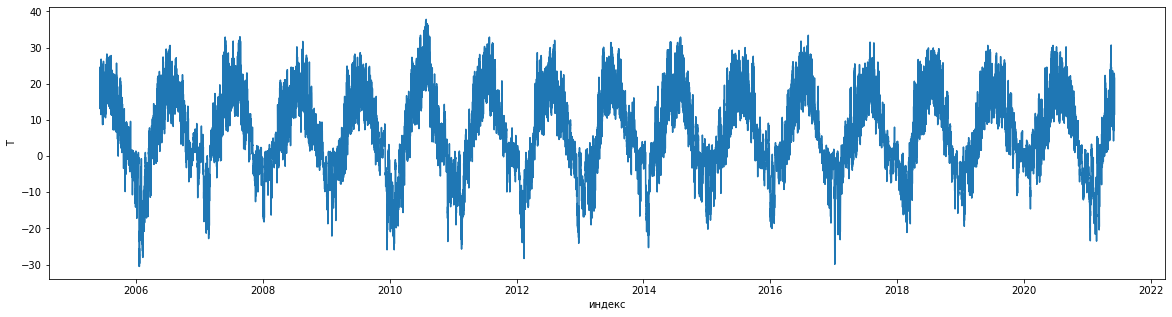

In [320]:
plt.figure(figsize=(20, 5))  # размер графика
plt.plot(data.index, data['T'])
# Подпишем оси
plt.xlabel('индекс')
plt.ylabel('T')

In [321]:
# Max температура
data['T'].max()

37.8

In [322]:
# min температура
data['T'].min()

-30.5

In [323]:
# Среднее арифметическое
data['T'].mean()  

6.6982506196836145

In [324]:
# Обзор количественных признаков
data['T'].describe()

count    56077.000000
mean         6.698251
std         10.771066
min        -30.500000
25%         -0.600000
50%          6.100000
75%         15.200000
max         37.800000
Name: T, dtype: float64

In [325]:
# Квантиль 
# 95% квантиль равен 23.8 градуса = температура в 95% случаев не превышает 23.8 градуса
# describe показывает 25, 50, 75 квантиль
data['T'].quantile(0.95)

23.8

In [326]:
quantile_99 = data['T'].quantile(0.99)
quantile_01 = data['T'].quantile(0.01)

# размножим число в колонку для удобства
data['quantile_99'] = quantile_99
data['quantile_01'] = quantile_01

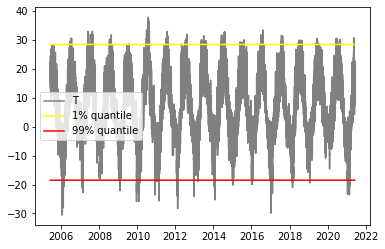

In [327]:
plt.plot(data.index, data['T'], color='gray', label='T')
plt.plot(data.index, data['quantile_99'], color='yellow', label='1% quantile')
plt.plot(data.index, data['quantile_01'], color='red', label='99% quantile')
plt.legend()

На графике видны года в которые превышена климатическая норма.

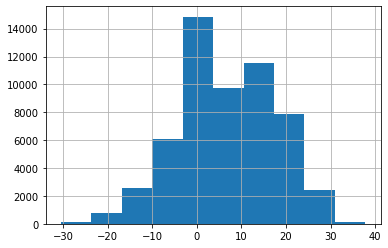

In [328]:
# Построим Гистограмму, которая показывает насколько часто встречается какое-то значение
data['T'].hist()

In [329]:
# Корреляция - функция, которая показывает, насколько два ряда "похожи" на друга
# 1e+00 = 1 * (10 в степени 0)
data.corr()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,Td,tR,Tg,quantile_99,quantile_01
T,1.000000e+00,-1.539168e-01,-2.259647e-01,-8.827506e-02,-4.244873e-01,-6.834396e-02,0.094343,1.303362e-03,9.666777e-01,9.764384e-01,9.067766e-01,9.142627e-03,8.476667e-01,4.404534e-15,NaN
Po,-1.539168e-01,1.000000e+00,9.967386e-01,5.536420e-02,-1.593184e-01,-1.578785e-01,-0.246295,-7.242498e-02,-1.915431e-01,-1.341533e-01,-2.394186e-01,-1.092680e-02,-1.820953e-01,7.732226e-13,NaN
P,-2.259647e-01,9.967386e-01,1.000000e+00,5.988593e-02,-1.286719e-01,-1.506504e-01,-0.252468,-7.474369e-02,-2.606649e-01,-2.053937e-01,-3.049476e-01,-1.134693e-02,-2.288891e-01,-4.346056e-13,NaN
Pa,-8.827506e-02,5.536420e-02,5.988593e-02,1.000000e+00,9.769155e-02,6.970361e-02,0.052714,1.714766e-01,1.861786e-02,7.020512e-02,-2.857542e-02,-2.663461e-02,-6.749201e-02,4.780113e-17,NaN
U,-4.244873e-01,-1.593184e-01,-1.286719e-01,9.769155e-02,1.000000e+00,-2.269676e-01,0.057845,-4.942695e-02,-2.225467e-01,-3.320264e-01,-1.256892e-02,6.145032e-03,8.806704e-03,-1.255959e-14,NaN
Ff,-6.834396e-02,-1.578785e-01,-1.506504e-01,6.970361e-02,-2.269676e-01,1.000000e+00,0.363035,3.740687e-01,-7.371878e-02,-2.980856e-01,-1.765639e-01,-5.624446e-03,-9.833865e-02,2.111541e-14,NaN
ff10,9.434310e-02,-2.462945e-01,-2.524684e-01,5.271387e-02,5.784536e-02,3.630347e-01,1.000000,5.813952e-01,3.321329e-01,1.164994e-01,1.455456e-01,NaN,NaN,NaN,NaN
ff3,1.303362e-03,-7.242498e-02,-7.474369e-02,1.714766e-01,-4.942695e-02,3.740687e-01,0.581395,1.000000e+00,-9.407540e-02,1.028696e-01,-1.361321e-02,NaN,-6.543224e-02,5.524121e-16,NaN
Tn,9.666777e-01,-1.915431e-01,-2.606649e-01,1.861786e-02,-2.225467e-01,-7.371878e-02,0.332133,-9.407540e-02,1.000000e+00,1.000000e+00,9.672947e-01,NaN,9.654705e-01,2.374512e-15,NaN
Tx,9.764384e-01,-1.341533e-01,-2.053937e-01,7.020512e-02,-3.320264e-01,-2.980856e-01,0.116499,1.028696e-01,1.000000e+00,1.000000e+00,9.132926e-01,1.314667e-02,NaN,-5.576851e-16,NaN


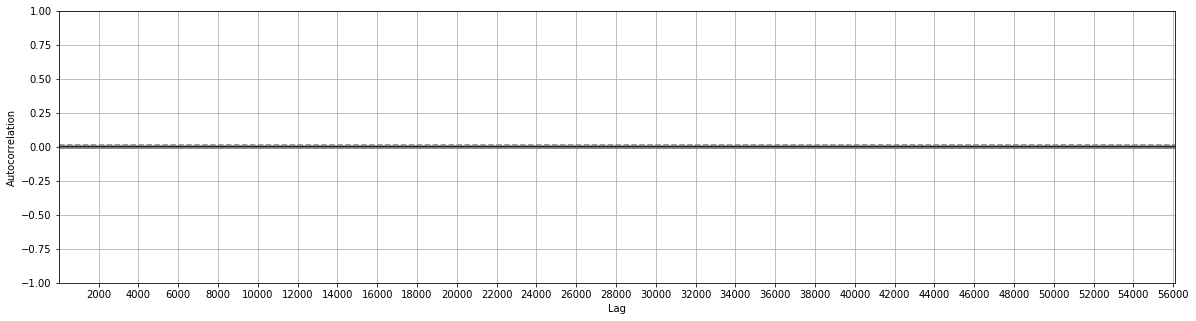

In [330]:
# График, который показывает автокорреляцию в зависимости от сдвига (Lag)
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data['T'])
plt.locator_params('x', nbins=50)

In [331]:
# Ряд максимально похож сам на себя - много значений за один день
# Оставим одно значение в 6:00
# Данные о времени находятся в индексе - нужно переместить в колонку
data['date_col'] = data.index
data['date_col'].dt.hour  # Атрибут dt для времени позволяет получать меся-год-день-время. Получим часы.
data_daily = data[data['date_col'].dt.hour == 6]
# Оставили только измерения в 6 часов утра

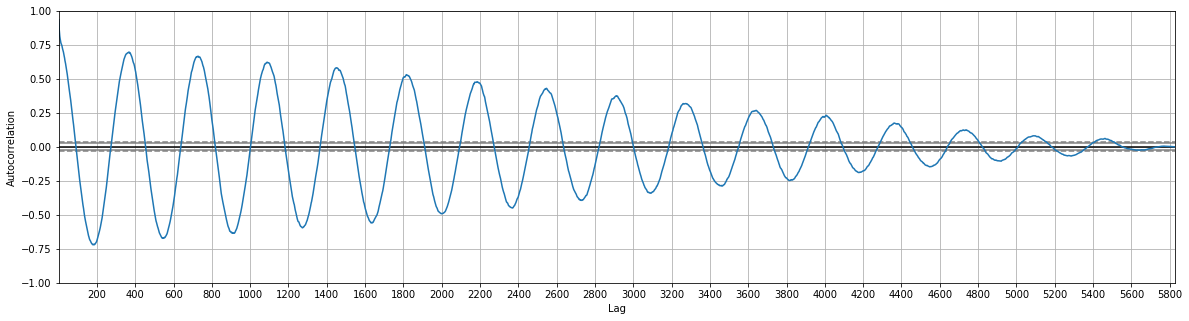

In [332]:
# График, который показывает автокорреляцию в зависимости от сдвига (Lag)
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data_daily['T'])
plt.locator_params('x', nbins=50)

In [333]:
# Видим пик на 365 дней - 1 год

In [334]:
# Построим тренд
N = len(data_daily)  # Длина таблицы = количество строк
x_range = list(range(N))  # создать список, который пересчитывает натуральные числа от 0 до N
X = pd.DataFrame(x_range) # создать табличку из одной колонки
X

,0
0,0
1,1
2,2
3,3
4,4
...,...
5822,5822
5823,5823
5824,5824
5825,5825


In [335]:
# Обучаем модель
regressor = LinearRegression()
regressor.fit(X, data_daily['T'])

LinearRegression()

In [336]:
# Делаем предсказание
regressor.predict(X)

array([4.27111101, 4.27113871, 4.27116641, ..., 4.43242035, 4.43244804,
       4.43247574])

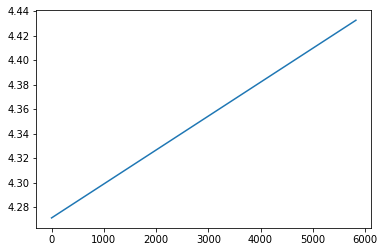

In [337]:
result = regressor.predict(X)
plt.plot(x_range, result)

# Имеем линейно восходящий тренд по росту стредней температуры за период 2005 - 2021 года

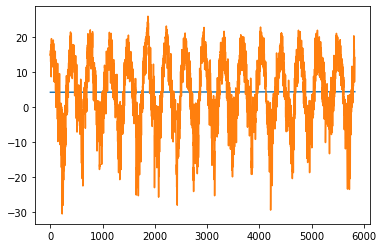

In [338]:
plt.plot(x_range, result)
plt.plot(x_range, data_daily['T'])

Построим Скользящие среднее (среднее значение не за один период, а за какой-то промежуток времени)

In [339]:
# период (ширина окна)
data_daily['T'].rolling(50).mean()

date
2005-06-06 06:00:00      NaN
2005-06-07 06:00:00      NaN
2005-06-08 06:00:00      NaN
2005-06-09 06:00:00      NaN
2005-06-10 06:00:00      NaN
                       ...  
2021-06-02 06:00:00    8.804
2021-06-03 06:00:00    8.796
2021-06-04 06:00:00    8.854
2021-06-05 06:00:00    8.984
2021-06-06 06:00:00    9.114
Name: T, Length: 5827, dtype: float64

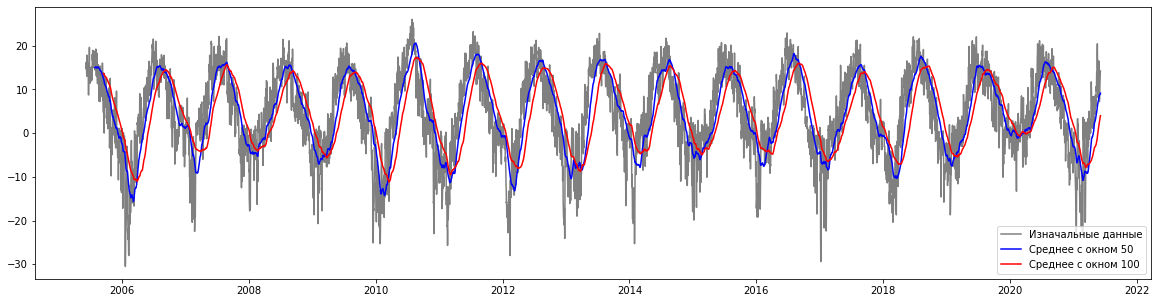

In [340]:
plt.figure(figsize=(20, 5))
plt.plot(data_daily.index, data_daily['T'], color='gray', label='Изначальные данные')
plt.plot(data_daily.index, data_daily['T'].rolling(50).mean(), color='blue', label='Среднее с окном 50')
plt.plot(data_daily.index, data_daily['T'].rolling(100).mean(), color='red', label='Среднее с окном 100')
plt.legend()

In [341]:
# На графике отражается сезонность.